In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


# Binary classification with the logistic regression

For $n$ samples $(x_i, y_i)_{i=1,\ldots, n}$ :

$$ P[y_i = 1] = \sigma(\mathbf{X}_i \mathbf{w} ) $$ 

with $\sigma$ the sigmoid or logistic function:

$$ \sigma(x) = \frac{1}{1 + e^{x}} $$ 

## The famous Iris dataset

http://archive.ics.uci.edu/ml/datasets/Iris

In [8]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-11-11 19:17:38--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data.2'

iris.data.2         100%[=====================>]   4.44K  --.-KB/s   in 0s     

2016-11-11 19:17:38 (114 MB/s) - 'iris.data.2' saved [4551/4551]



In [17]:
iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

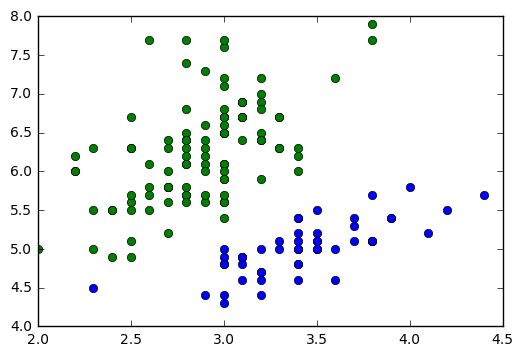

In [45]:
x_1 = iris.sepal_width.values
x_2 = iris.sepal_length.values

X = np.hstack([x_1, x_2])

# Iris-setosa versus the other species
targets = 1.0 * (iris.species.values == 'Iris-setosa')

plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', label='$y = 1$');
plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', label='$y = 0$');

targets

# Exercise

Let's built a binary classifier recognizing Iris-setosa based on the sepals width and length.

 * Start with any of the high level wrappers from `sklearn` (Look at http://scikit-learn.org/stable/supervised_learning.html, you can try http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html but also give a go at a Naive Bayse approach, ...)

 * Plot the prediction of your model with 4 colours for the:
     * true positives $\{y = 1, \hat{y} = 1 \}$
     * false positives $\{y = 0, \hat{y} = 1 \}$
     * etc...
     
 * Adapt last week Tensorflow stochastic gradient procedure for the linear model (you now have $d = 3$, ie an additional weight)
 
 * Any intuition what's wrong with using a simple linear regression to predict our targets?
 
 * Adapt the example here to our dataset https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/logistic_regression.ipynb